In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import uproot
from yahist import Hist1D
from matplotlib.ticker import AutoMinorLocator
import os
from os import listdir
from os.path import isfile, join

In [2]:
# matplotlob params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
# functions for reading files
path_to_mc = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTJets/"
mc_dirs = [f.path for f in os.scandir(path_to_mc) if f.is_dir() and 'v4-0-1' in f.path]
mc_files_list = lambda i : [f for f in listdir(mc_dirs[i]) if isfile(join(mc_dirs[i], f))]
def mc_files(i,j):
    return uproot.open(mc_dirs[i] + '/' + mc_files_list(i)[j]).get("tree").pandas.df(flatten=False)
def mc_nevents(i,j):
    return uproot.open(mc_dirs[i] + '/' + mc_files_list(i)[j]).get("n_events").allvalues[1]

path_to_data = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/MuonEG/"
data_dirs = [f.path for f in os.scandir(path_to_data) if f.is_dir() and 'v4-0-1' in f.path]
data_files_list = lambda i : [f for f in listdir(data_dirs[i]) if isfile(join(data_dirs[i], f))]
def data_files(i,j):
    return uproot.open(data_dirs[i] + '/' + data_files_list(i)[j]).get("tree").pandas.df(flatten=False)

In [4]:
# making list w/ functions above
mc_list = [mc_files(i,j) for i in range(len(mc_dirs)) for j in range(len(mc_files_list(i)))]
data_list = [data_files(i,j) for i in range(len(data_dirs)) for j in range(len(data_files_list(i)))]

In [5]:
# Add xsec branch for easier calc
for i in range(len(mc_files_list(0))):
    mc_list[i].insert(1,'xsec',87.3)
for j in range(len(mc_files_list(0)), len(mc_list)):
    mc_list[j].insert(1,'xsec',182.7)

In [6]:
# concat to make df
mc_c = pandas.concat(mc_list)
data_c = pandas.concat(data_list)

In [13]:
mc_c

,num_pvs,xsec,met,ht,leading_lep_id,leading_lep_pt,leading_lep_eta,leading_lep_phi,trailing_lep_id,trailing_lep_pt,...,jet_ch_pv0_Efrac,jet_ch_pv1_Efrac,jet_ch_pv2_Efrac,jet_ch_pv3_Efrac,num_jets,gen_weight,mc_weight,mc_loose_btag_weight,mc_medium_btag_weight,mc_tight_btag_weight
entry,,,,,,,,,,,,,,,,,,,,,
0,21,87.3,53.264961,215.906250,11,71.910446,-1.023438,-2.456055,-13,64.311935,...,"[0.080078125, 0.0087890625, 0.0, 0.09863281, 0...","[0.06347656, 0.04638672, 0.0, 0.041992188, 0.1...","[0.34765625, 0.2578125, 0.0, 0.083984375, 0.06...","[0.119140625, 0.34765625, 0.0, 0.546875, 0.570...",5.0,1.0,0.882999,0.963191,0.932931,0.914119
1,22,87.3,39.344402,376.125000,-11,122.384247,-0.856079,-1.480957,13,71.273842,...,"[0.08203125, 0.072265625, 0.17382812, 0.2421875]","[0.11328125, 0.10253906, 0.12402344, 0.06640625]","[0.359375, 0.4296875, 0.0, 0.05078125]","[0.19726562, 0.0703125, 0.5078125, 0.390625]",4.0,1.0,0.887076,0.973919,0.959000,0.938954
2,22,87.3,40.036427,325.718750,13,53.715393,0.054451,1.035156,-11,36.873802,...,"[0.072265625, 0.05078125, 0.0, 0.0, 0.095703125]","[0.083984375, 0.21679688, 0.0, 0.0, 0.08886719]","[0.018310547, 0.3046875, 0.0, 0.0, 0.22070312]","[0.4921875, 0.0, 0.0, 0.0, 0.1484375]",5.0,1.0,0.881980,0.948681,0.932238,0.910831
3,23,87.3,41.218204,307.281250,13,96.789047,-0.624268,-0.246948,-11,25.714207,...,"[0.07519531, 0.030273438, 0.0, 0.15234375]","[0.0035705566, 0.18359375, 0.05908203, 0.11425...","[0.4296875, 0.30078125, 0.36328125, 0.045898438]","[0.05419922, 0.18554688, 0.25390625, 0.14453125]",4.0,1.0,0.903824,0.970917,0.950963,0.930678
4,14,87.3,21.552195,278.531250,-13,101.423943,1.387207,1.495850,11,34.644066,...,"[0.0390625, 0.013061523, 0.061035156, 0.21484375]","[0.0859375, 0.0, 0.010620117, 0.040039062]","[0.6171875, 0.703125, 0.16015625, 0.05078125]","[0.16601562, 0.0, 0.703125, 0.5546875]",4.0,1.0,0.921672,0.970381,0.950911,0.932069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,24,182.7,193.324203,530.437500,13,56.674881,0.072647,1.177246,-11,47.473774,...,"[0.025634766, 0.0625, 0.06933594, 0.12890625]","[0.006958008, 0.02368164, 0.0390625, 0.11230469]","[0.3984375, 0.31640625, 0.016357422, 0.020263672]","[0.296875, 0.296875, 0.6015625, 0.59375]",4.0,1.0,0.905376,0.979483,0.969450,0.945883
3,15,182.7,154.004868,701.687500,-11,101.915131,-0.969360,-0.074570,13,23.549583,...,"[0.038085938, 0.045410156, 0.0033874512, 0.012...","[0.026123047, 0.01586914, 0.044921875, 0.04394...","[0.044433594, 0.15234375, 0.09765625, 0.018554...","[0.41015625, 0.41015625, 0.19140625, 0.4492187...",8.0,1.0,0.900129,0.959235,0.934973,0.906515
0,17,182.7,119.379715,488.375000,-11,73.245605,-1.176758,0.287048,13,56.832096,...,"[0.055664062, 0.04345703, 0.06347656, 0.052246...","[0.018554688, 0.012451172, 0.020507812, 0.0064...","[0.0, 0.5625, 0.24804688, 0.13671875, 0.3828125]","[0.6484375, 0.10449219, 0.359375, 0.7109375, 0...",5.0,1.0,0.906819,0.955786,0.951662,0.933167


In [7]:
n_events = sum([mc_nevents(i,j) for i in range(len(mc_dirs)) for j in range(len(mc_files_list(i)))])

In [10]:
xsec_weight = mc_c.xsec * 35920 / n_events

In [11]:
comb_w = mc_c.mc_weight * mc_c.mc_tight_btag_weight * xsec_weight * mc_c.gen_weight

In [15]:
comb_w

entry
0    0.020608
1    0.021266
2    0.020511
3    0.021477
4    0.021933
       ...   
2    0.045759
3    0.043600
0    0.045215
1    0.044909
2    0.045447
Length: 106804, dtype: float64

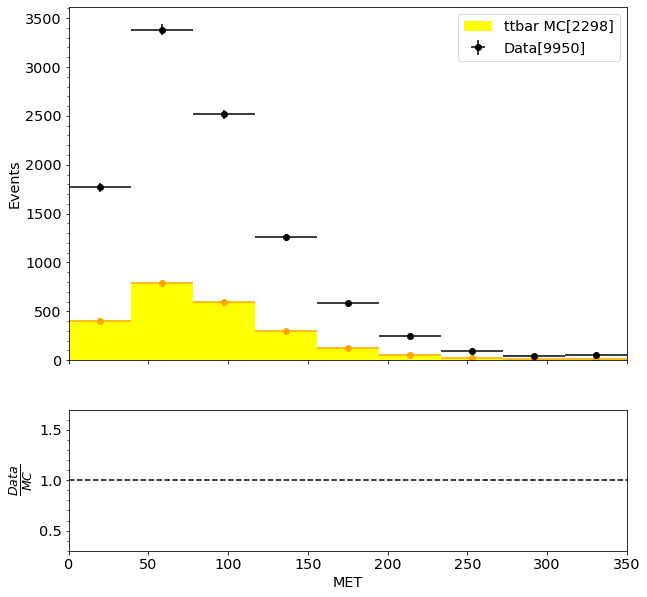

In [12]:
bins = np.linspace(0,350,10)
mc_p = Hist1D(mc_c.met,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.met,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.met,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,350)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"MET")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,2000,20)
mc_p = Hist1D(mc_c.vbs_dijet_mass,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.vbs_dijet_mass,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.vbs_dijet_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,2000)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"DiJet Mass")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,500,20)
mc_p = Hist1D(mc_c.dilep_mass,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.dilep_mass,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.dilep_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,500)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"DiLepton Mass")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,300,10)
mc_p = Hist1D(mc_c.leading_lep_pt,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_pt,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_pt,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,300)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton Pt")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,200,10)
mc_p = Hist1D(mc_c.trailing_lep_pt,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_pt,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_pt,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,200)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton Pt")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-3,3,10)
mc_p = Hist1D(mc_c.leading_lep_eta,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_eta,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_eta,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-3,3)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-3,3,10)
mc_p = Hist1D(mc_c.trailing_lep_eta,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_eta,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_eta,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-3,3)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(0,12,13)
mc_p = Hist1D(mc_c.num_jets,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.num_jets,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.num_jets,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(0,12)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Number of Jets")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-4,4,10)
mc_p = Hist1D(mc_c.leading_lep_phi,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.leading_lep_phi,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.leading_lep_phi,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-4,4)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')

In [ ]:
bins = np.linspace(-4,4,10)
mc_p = Hist1D(mc_c.trailing_lep_phi,weights=comb_w,bins=bins,label='ttbar MC['+str(round(sum(comb_w)))+']',color='yellow')
mc_pe = Hist1D(mc_c.trailing_lep_phi,weights=comb_w,bins=bins,color='orange')
data_p = Hist1D(data_c.trailing_lep_phi,bins=bins,label='Data['+str(len(data_c))+']',color='black')
one = np.ones(50)
one_x = np.linspace(-4,4)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
mc_p.plot(ax=ax1)
mc_pe.plot(ax=ax1,show_errors=True)
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/mc_p).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')